# 6.6 Sourcing & Analyzing Time Series Data

In [115]:
### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

#### I've analyzed the time series data for Personal Consumption Expenditures from the Federal Reserve Economic Data

## 01. Importing Libraries and Data

In [116]:
# Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [117]:
quandl.ApiConfig.api_key = 'NchBAWgLnSxHBxLUb7Zz'

In [118]:
df= quandl.get('FRED/PCE')

In [119]:
df.head(5)

,Value
Date,
1959-01-01,306.1
1959-02-01,309.6
1959-03-01,312.7
1959-04-01,312.2
1959-05-01,316.1


In [120]:
df.shape

(756, 1)

In [121]:
df.columns

Index(['Value'], dtype='object')

In [122]:
type(df)

pandas.core.frame.DataFrame

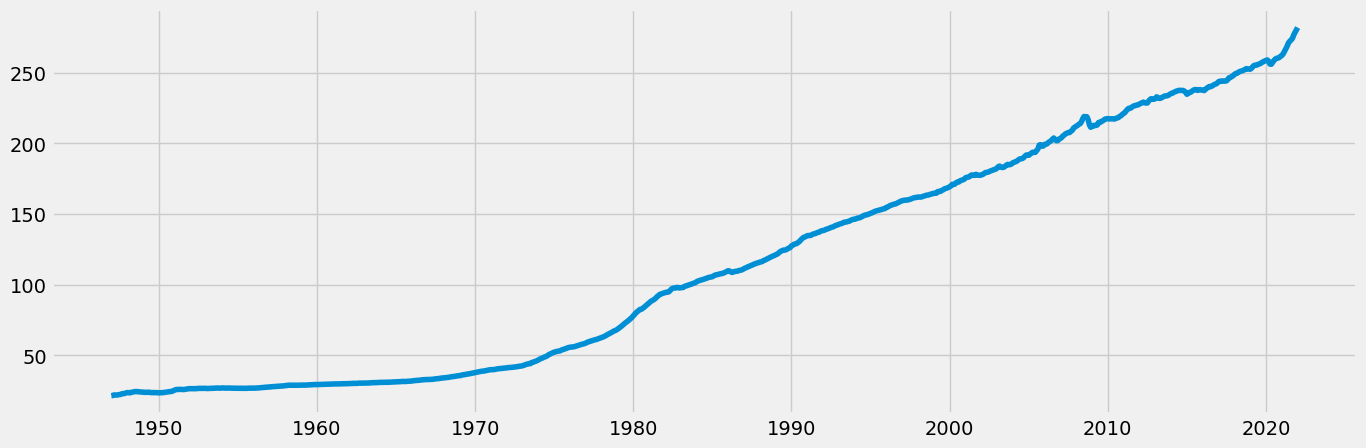

In [123]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(data)

## 03. Subsetting, wrangling, and cleaning time-series data

In [124]:
# Reset index so that you can use the "Date" column as a filter

df2 = df.reset_index()

In [125]:
df2.head()

,Date,Value
0,1959-01-01,306.1
1,1959-02-01,309.6
2,1959-03-01,312.7
3,1959-04-01,312.2
4,1959-05-01,316.1


In [126]:
sub_df = df2.loc[(df2['Date'] >= '2015-01-01')]

In [127]:
sub_df.shape

(84, 2)

In [128]:
sub_df.head()

,Date,Value
672,2015-01-01,12036.5
673,2015-02-01,12083.1
674,2015-03-01,12132.2
675,2015-04-01,12170.3
676,2015-05-01,12233.6


In [129]:
# Set the "Date" column as the index.

from datetime import datetime
sub_df['datetime'] = pd.to_datetime(sub_df['Date']) # Create a datetime column from \"Date.\"\"\n",
sub_df = sub_df.set_index('datetime')  # Set the datetime as the index of the dataframe.\n",
sub_df.drop(['Date'], axis=1, inplace=True) # Drop the \"Date\" column.\n",
sub_df.head()

,Value
datetime,
2015-01-01,12036.5
2015-02-01,12083.1
2015-03-01,12132.2
2015-04-01,12170.3
2015-05-01,12233.6


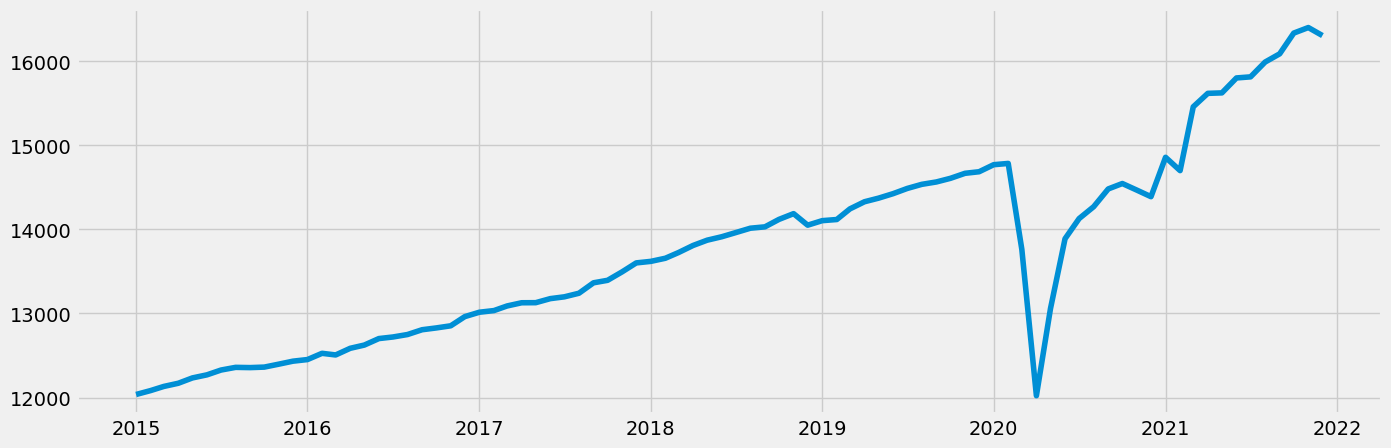

In [130]:
plt.figure(figsize=(15,5), dpi=100) 
    
plt.plot(sub_df)

In [131]:
# Check for missing values (you shouldn't have any)

sub_df.isnull().sum()

Value    0
dtype: int64

## 03. Time series analysis: decomposition

In [132]:
# Decompose the time series using an additive model
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub_df, model='additive')



In [133]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

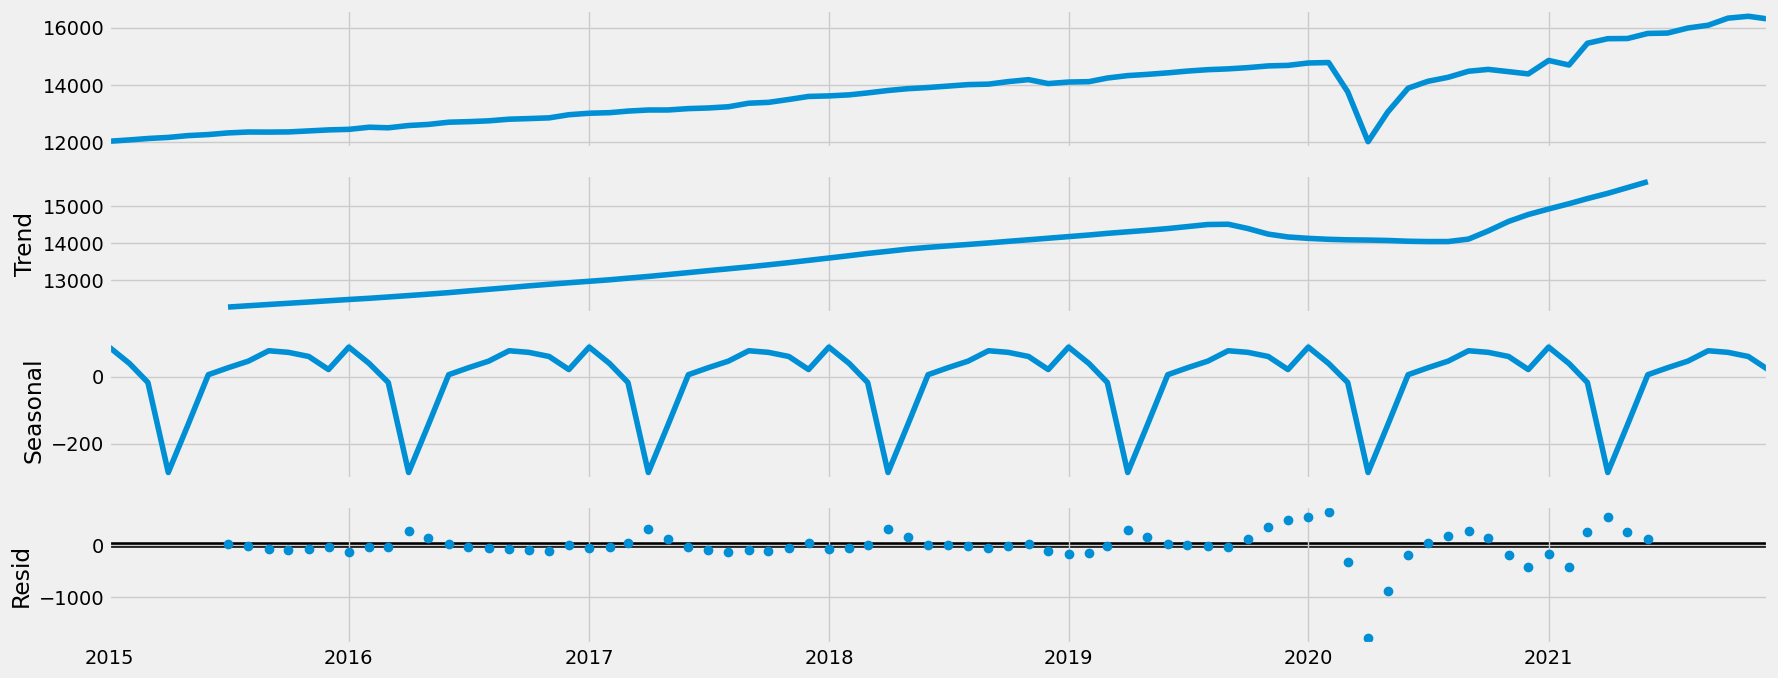

In [134]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The graph illustrates the breakdown of Personal Consumption Expenditures data into trend, seasonal, and residual components. The trend shows a steady rise with a slight dip around 2020 due to COVID-19. Seasonal patterns reflect periodic fluctuations, likely linked to seasonal spending habits. Residuals, representing unpredictable fluctuations, mostly cluster around zero, with outliers in 2020 possibly due to pandemic effects. Overall, expenditure trends are influenced by both long-term growth and seasonal variations, with occasional irregularities. Such analysis aids in forecasting expenditure patterns, guiding economic policies, and informing business strategies, particularly during disruptive events like the pandemic.

## 04. Testing for stationarity

In [135]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers. This is why you need to also define a function that prints the correct output from that array.\n",

from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): # Define the function,   
    
  # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)
# Apply the test using the function on the time series

dickey_fuller(sub_df['Value']) 

Dickey-Fuller Stationarity test:
Test Statistic                 -0.281275
p-value                         0.928115
Number of Lags Used             2.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
dtype: float64
Test Statistic                 -0.281275
p-value                         0.928115
Number of Lags Used             2.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
dtype: float64
Test Statistic                 -0.281275
p-value                         0.928115
Number of Lags Used             2.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


#### The Dickey-Fuller stationarity test output indicates that the time series, likely Personal Consumption Expenditures over time, is likely non-stationary. The test statistic (-0.281275) exceeds critical values at all confidence levels, suggesting non-rejection of the null hypothesis of non-stationarity. The high p-value (0.928115) further supports this conclusion. With only 2 lags used, the test's sensitivity may be limited. The non-stationarity implies the presence of trends or seasonal effects, necessitating techniques like differencing to make the series stationary. Addressing non-stationarity is crucial for accurate time series forecasting, often requiring preprocessing steps like detrending or deseasonalizing the data

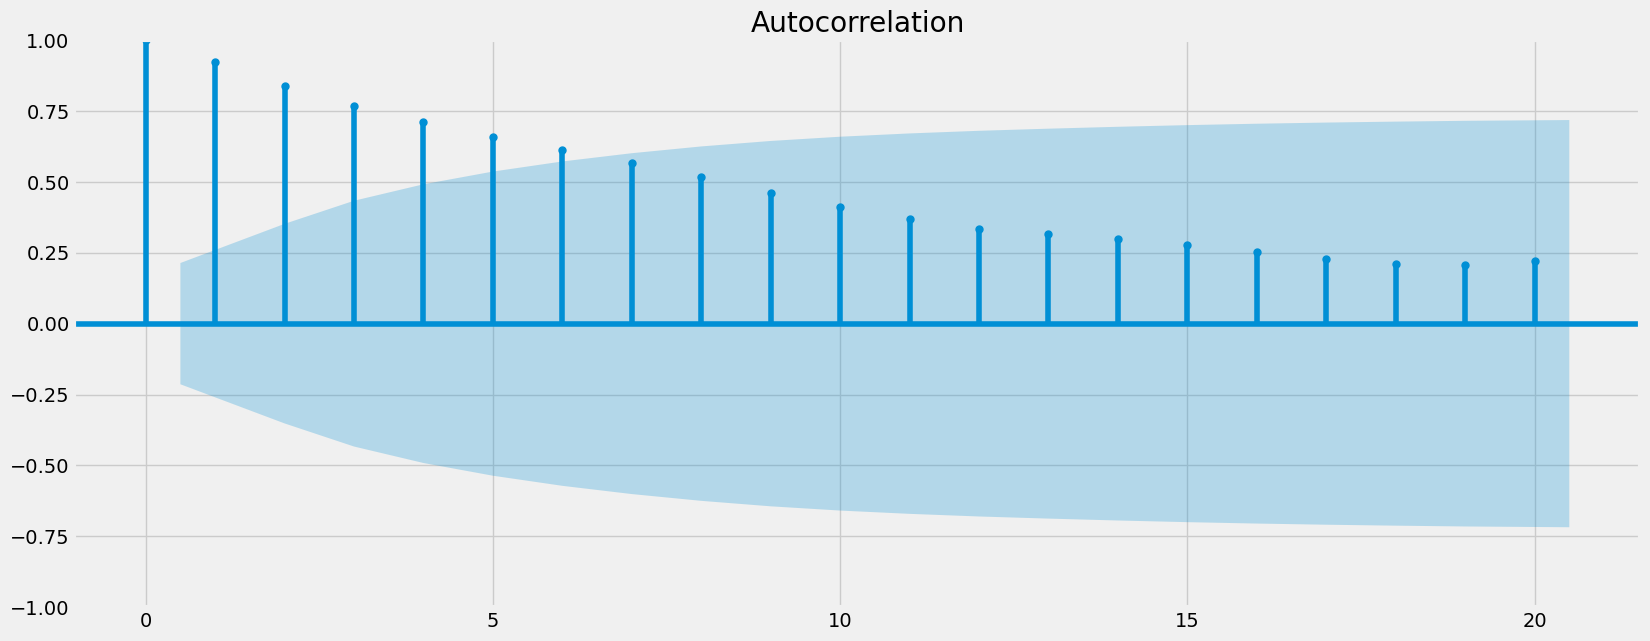

In [136]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots\n",

plot_acf(sub_df)
plt.show()

#### These characteristics suggest a non-stationary time series for "Personal Consumption Expenditures" with strong positive autocorrelation at initial lags, a gradual decline in autocorrelation over time, and evidence of seasonal behavior. Modeling this data may involve techniques like differencing to stabilize the mean, incorporating a moving average component to capture the gradual decay, and introducing a seasonal component to account for the observed periodicity.

## 05. Stationarizing the Federal Reserve Economic Data

In [137]:
df_diff = sub_df - sub_df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [138]:
df_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [139]:
df_diff.head()

,Value
datetime,
2015-02-01,46.6
2015-03-01,49.1
2015-04-01,38.1
2015-05-01,63.3
2015-06-01,36.7


In [140]:
df_diff.columns

Index(['Value'], dtype='object')

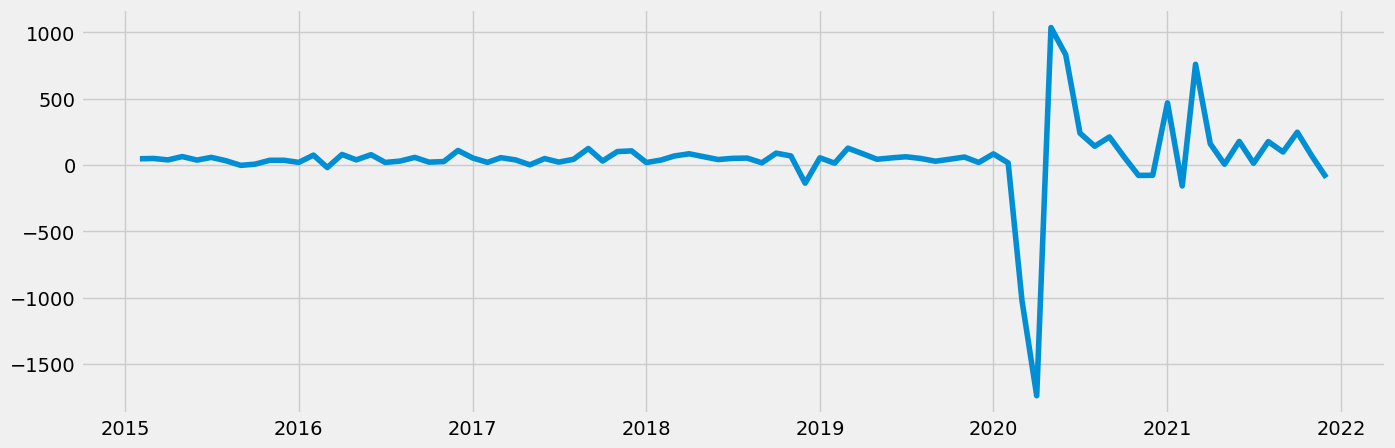

In [141]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [142]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.904557e+00
p-value                        4.099582e-12
Number of Lags Used            1.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
dtype: float64
Test Statistic                -7.904557e+00
p-value                        4.099582e-12
Number of Lags Used            1.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
dtype: float64
Test Statistic                -7.904557e+00
p-value                        4.099582e-12
Number of Lags Used            1.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64


### After applying the differencing method to stationarize the Personal Consumption Expenditures time series data, the test statistic now falls below the critical value at both the five and ten percent significance levels. This indicates rejection of the null hypothesis, suggesting the 'Personal Consumption Expenditures' data series is stationary.

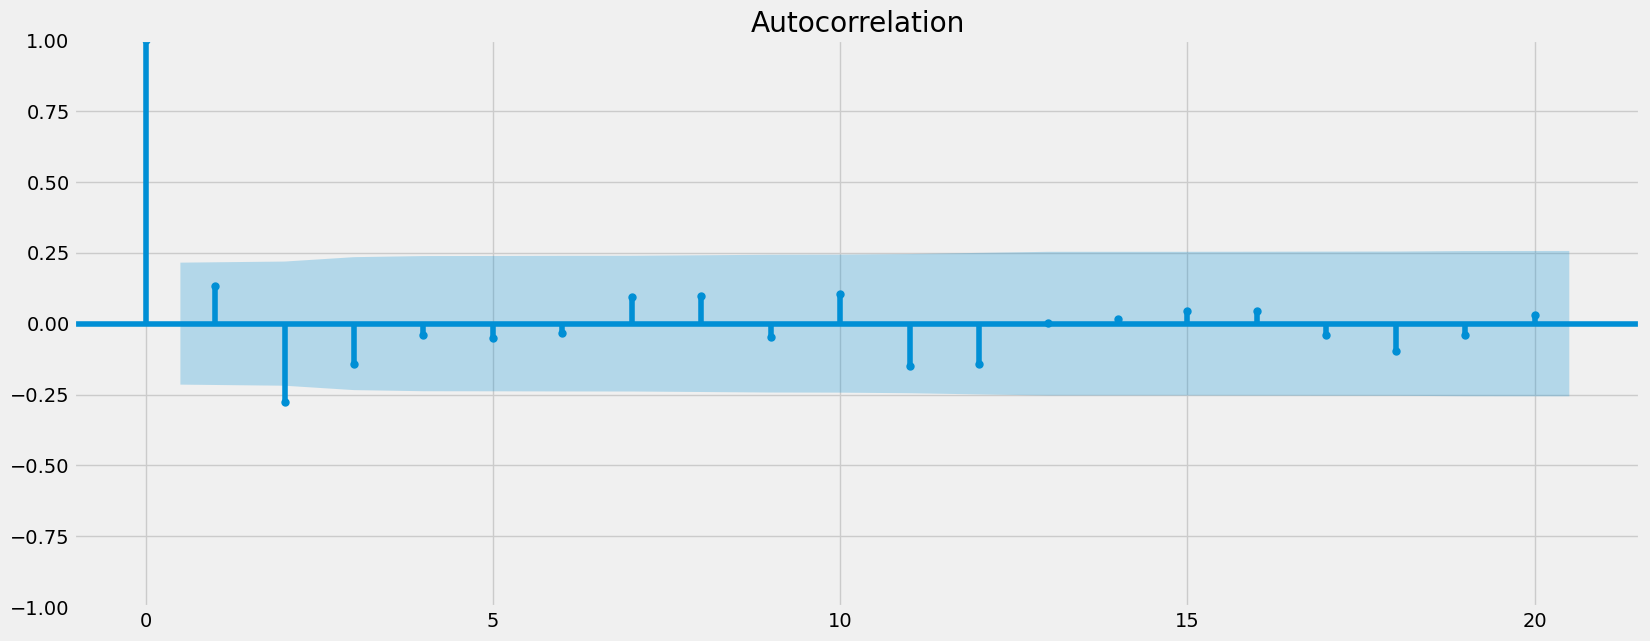

In [143]:
plot_acf(df_diff)
plt.show()

#### The second autocorrelation plot shows a notable decrease in autocorrelation at lag 1, indicating effective intervention or transformation to reduce immediate dependency between observations. Overall, autocorrelation values are markedly lower across all lags, suggesting increased stationarity with reduced dependency over time. Minimal periodic effects are observed, with autocorrelations fluctuating around zero and within confidence bands, indicating statistical insignificance. These changes reflect successful modifications, possibly through differencing, detrending, or transformation, aimed at stabilizing variance and mean, and reducing the influence of seasonal components, resulting in a more random or white noise process.